In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 1 Cleaning

In [ ]:
data1.shape

(50005, 18)

In [ ]:
data1.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#all the rows that are null
data1[data1['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#because all the column values are none values, drop those rows
before_drop_na = len(data1)
data1 = data1.dropna()
after_drop_na = len(data1)
print("number of data dropped:", before_drop_na-after_drop_na)

number of data dropped: 5


In [ ]:
data1.shape

(50000, 18)

# What to do with Tempo column in Data 1

In [ ]:
#the tempo column in data 1 are strings with "?", therefore need to convert to integer
print(len(data1[data1["tempo"] == "?"]))
print(len(data1))

4980
50000


# Label encoding variables in data 1

In [ ]:
#make key, mode into One Hot encoding
#music_genre into label encoding
onehot = OneHotEncoder(sparse=False)
onehot.fit(data1[['key', 'mode']])
onehotencoded = onehot.transform(data1[['key', 'mode']])
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data1[['key', 'mode']].columns) for cat in onehot.categories_[i]]
onehotdf = pd.DataFrame(onehotencoded, columns=categorical_columns)
data1 = pd.concat([data1.reset_index(), onehotdf.reset_index()], axis=1)

labelencoder = LabelEncoder()
data1['key_num'] = labelencoder.fit_transform(data1['key'])
data1['mode_num'] = labelencoder.fit_transform(data1['mode'])
data1['music_genre_num'] = labelencoder.fit_transform(data1['music_genre'])
data1

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor,key_num,mode_num,music_genre_num
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,5
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,1,5
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,11,0,5
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,5
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,0,6
49996,50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,6
49997,50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5,0,6
49998,50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,10,1,6


In [ ]:
data1_edit = data1.drop(columns = ["index", "instance_id", "artist_name", "track_name", "key", "mode", "tempo", "obtained_date", "music_genre", "key_num", "mode_num", "music_genre_num"])
features = data1_edit.columns

In [ ]:
features

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence',
       'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'],
      dtype='object')

In [ ]:
data1_edit

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,59.0,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,72.0,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49997,51.0,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,65.0,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# CNN Baseline (Data 1)

In [ ]:
# Separate features and target variable
X = data1_edit  # Features
y = data1['music_genre_num']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/5
1250/1250 [==============================] - 24s 17ms/step - loss: 1.4340 - accuracy: 0.4537 - val_loss: 1.2528 - val_accuracy: 0.5193
Epoch 2/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2370 - accuracy: 0.5236 - val_loss: 1.2226 - val_accuracy: 0.5319
Epoch 3/5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.1953 - accuracy: 0.5367 - val_loss: 1.1851 - val_accuracy: 0.5476
Epoch 4/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1705 - accuracy: 0.5475 - val_loss: 1.1814 - val_accuracy: 0.5471
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.1548 - accuracy: 0.5592
Test Accuracy: 0.5591999888420105


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (40000, 24)
X_test shape: (10000, 24)


## Attempt 1

In [ ]:
# Define the CNN model with additional layers and regularization
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.2),  # Add dropout for regularization
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/5
1250/1250 [==============================] - 27s 19ms/step - loss: 1.7496 - accuracy: 0.3448 - val_loss: 1.3949 - val_accuracy: 0.4724
Epoch 2/5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4618 - accuracy: 0.4499 - val_loss: 1.2884 - val_accuracy: 0.5103
Epoch 3/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.3985 - accuracy: 0.4717 - val_loss: 1.2563 - val_accuracy: 0.5220
Epoch 4/5
1250/1250 [==============================] - 22s 18ms/step - loss: 1.3655 - accuracy: 0.4816 - val_loss: 1.2362 - val_accuracy: 0.5226
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 1.2263 - accuracy: 0.5282
Test Accuracy: 0.5281999707221985


In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
y_pred = np.argmax(model.predict(X_test), axis=-1)

Epoch 1/5
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2704 - accuracy: 0.5138 - val_loss: 1.1890 - val_accuracy: 0.5337
Epoch 2/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2667 - accuracy: 0.5128 - val_loss: 1.1653 - val_accuracy: 0.5465
Epoch 3/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2563 - accuracy: 0.5147 - val_loss: 1.1803 - val_accuracy: 0.5477
Epoch 4/5
1250/1250 [==============================] - 35s 28ms/step - loss: 1.2541 - accuracy: 0.5191 - val_loss: 1.1678 - val_accuracy: 0.5500
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 1.1597 - accuracy: 0.5424
Test Accuracy: 0.5424000024795532
313/313 [==============================] - 3s 8ms/step


<Figure size 10000x8000 with 0 Axes>

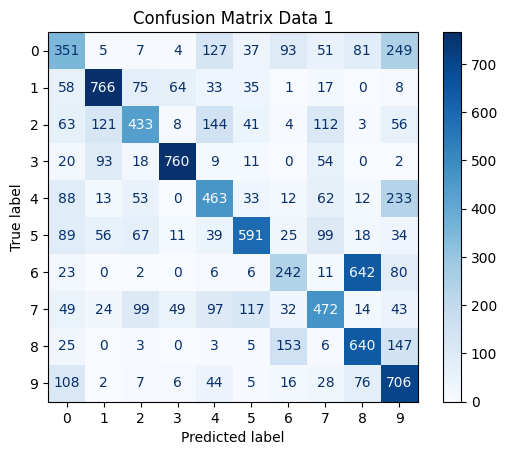

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=np.unique(y_test)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 1')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
print("Classification Report for Data 1:")
print(classification_report(y_test, y_pred))

Classification Report for Data 1:
              precision    recall  f1-score   support

           0       0.40      0.35      0.37      1005
           1       0.71      0.72      0.72      1057
           2       0.57      0.44      0.50       985
           3       0.84      0.79      0.81       967
           4       0.48      0.48      0.48       969
           5       0.67      0.57      0.62      1029
           6       0.42      0.24      0.30      1012
           7       0.52      0.47      0.49       996
           8       0.43      0.65      0.52       982
           9       0.45      0.71      0.55       998

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



## Data 2 Cleaning

In [ ]:
data2.shape

(114000, 21)

In [ ]:
data2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#drop all the rows that are null
data2 = data2.dropna()

In [ ]:
len(data2)

113999

In [ ]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

/tmp/ipykernel_212/4236097146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [ ]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

## CNN Baseline (Data 2)

In [ ]:
# Separate features and target variable for data 2
X2 = data2[features2]  # Features for data 2
y2 = data2['track_genre_num']  # Target variable for data 2

# Split the dataset into training and testing sets for data 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

# Standardize the features for data 2 (optional but recommended for neural networks)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Reshape the data for CNN input for data 2
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

# Define the CNN model for data 2
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], 1)),
    Conv1D(64, 3, activation='relu'),
    Conv1D(128, 3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for data 2
model2.fit(X_train2, y_train2, epochs=5, batch_size=32, validation_data=(X_test2, y_test2))

# Evaluate the model on the test set for data 2
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test2)
print("Test Accuracy for Data 2:", test_acc2)


Epoch 1/5
2850/2850 [==============================] - 76s 26ms/step - loss: 3.3482 - accuracy: 0.1866 - val_loss: 2.9697 - val_accuracy: 0.2418
Epoch 2/5
2850/2850 [==============================] - 73s 26ms/step - loss: 2.8712 - accuracy: 0.2615 - val_loss: 2.7875 - val_accuracy: 0.2738
Epoch 3/5
2850/2850 [==============================] - 70s 25ms/step - loss: 2.7111 - accuracy: 0.2920 - val_loss: 2.6963 - val_accuracy: 0.2902
Epoch 4/5
2850/2850 [==============================] - 68s 24ms/step - loss: 2.6132 - accuracy: 0.3083 - val_loss: 2.6578 - val_accuracy: 0.2975
Epoch 5/5
713/713 [==============================] - 7s 10ms/step - loss: 2.6193 - accuracy: 0.3068
Test Accuracy for Data 2: 0.30675438046455383


In [ ]:
print("Shape of X_train2 before reshaping:", X_train2.shape)
print("Shape of X_test2 before reshaping:", X_test2.shape)

# Reshape the data for CNN input for data 2
X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)

print("Shape of X_train2 after reshaping:", X_train2.shape)
print("Shape of X_test2 after reshaping:", X_test2.shape)


Shape of X_train2 before reshaping: (91199, 14)
Shape of X_test2 before reshaping: (22800, 14)
Shape of X_train2 after reshaping: (91199, 14, 1)
Shape of X_test2 after reshaping: (22800, 14, 1)


## Attempt 1

In [ ]:
model2 = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train2.shape[1], X_train2.shape[2]), padding='same'),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Conv1D(128, 3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y2)), activation='softmax')
])

# Compile the model with a lower learning rate
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with the enhanced architecture and regularization for data 2
history2 = model2.fit(X_train2, y_train2, epochs=5, batch_size=32, validation_data=(X_test2, y_test2), callbacks=[early_stopping])

# Evaluate the model for data 2
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test2)
print("Test Accuracy for Data 2:", test_acc2)

Epoch 1/5
2850/2850 [==============================] - 67s 23ms/step - loss: 3.3330 - accuracy: 0.1895 - val_loss: 2.9473 - val_accuracy: 0.2416
Epoch 2/5
2850/2850 [==============================] - 63s 22ms/step - loss: 2.8473 - accuracy: 0.2639 - val_loss: 2.7602 - val_accuracy: 0.2780
Epoch 3/5
2850/2850 [==============================] - 63s 22ms/step - loss: 2.7117 - accuracy: 0.2860 - val_loss: 2.6978 - val_accuracy: 0.2889
Epoch 4/5
2850/2850 [==============================] - 59s 21ms/step - loss: 2.6292 - accuracy: 0.3017 - val_loss: 2.6804 - val_accuracy: 0.2916
Epoch 5/5
713/713 [==============================] - 7s 10ms/step - loss: 2.6478 - accuracy: 0.2974
Test Accuracy for Data 2: 0.2973684072494507


In [ ]:
print("Shape of X_train2 before reshaping:", X_train2.shape)
print("Shape of X_test2 before reshaping:", X_test2.shape)


Shape of X_train2 before reshaping: (91199, 14, 1)
Shape of X_test2 before reshaping: (22800, 14, 1)


In [ ]:
history2 = model2.fit(X_train2, y_train2, epochs=5, batch_size=32, validation_data=(X_test2, y_test2), callbacks=[early_stopping])
test_loss2, test_acc2 = model2.evaluate(X_test2, y_test2)
print("Test Accuracy for Data 2:", test_acc2)
y_pred2 = np.argmax(model2.predict(X_test2), axis=-1)

Epoch 1/5
2850/2850 [==============================] - 72s 25ms/step - loss: 2.5128 - accuracy: 0.3189 - val_loss: 2.6019 - val_accuracy: 0.3039
Epoch 2/5
2850/2850 [==============================] - 74s 26ms/step - loss: 2.4638 - accuracy: 0.3307 - val_loss: 2.5898 - val_accuracy: 0.3100
Epoch 3/5
2850/2850 [==============================] - 78s 27ms/step - loss: 2.4245 - accuracy: 0.3351 - val_loss: 2.5926 - val_accuracy: 0.3068
Epoch 4/5
2850/2850 [==============================] - 81s 29ms/step - loss: 2.3852 - accuracy: 0.3438 - val_loss: 2.5984 - val_accuracy: 0.3087
Epoch 5/5
713/713 [==============================] - 13s 18ms/step - loss: 2.5898 - accuracy: 0.3100
Test Accuracy for Data 2: 0.3099561333656311
713/713 [==============================] - 12s 15ms/step


<Figure size 10000x8000 with 0 Axes>

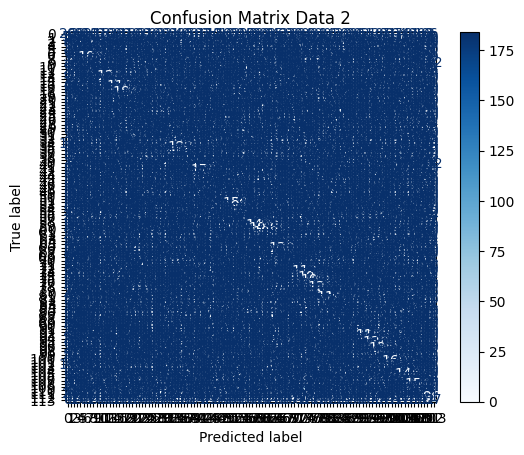

In [ ]:
cm2 = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(100, 80))
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=np.unique(y_test2)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix Data 2')
plt.show()
#print("Confusion Matrix:")
#print(conf_matrix)

In [ ]:
print("Classification Report for Data 2:")
print(classification_report(y_test2, y_pred2))

Classification Report for Data 2:
              precision    recall  f1-score   support

           0       0.21      0.12      0.15       214
           1       0.31      0.28      0.30       202
           2       0.11      0.20      0.14       206
           3       0.13      0.03      0.05       201
           4       0.27      0.34      0.30       192
           5       0.24      0.08      0.11       199
           6       0.64      0.44      0.52       195
           7       0.33      0.61      0.42       178
           8       0.14      0.03      0.05       229
           9       0.16      0.23      0.19       206
          10       0.49      0.43      0.46       200
          11       0.17      0.04      0.07       187
          12       0.32      0.13      0.19       222
          13       0.46      0.61      0.53       203
          14       0.49      0.34      0.40       201
          15       0.26      0.41      0.31       208
          16       0.56      0.58      0.57    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>